Fractal de newton para  x^8+15x^4-16

In [83]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z,n):
  if n==2:
    return np.sin(z)
  elif n==1:
    return z**3 - 2*z + 2
  else:
    return z**3-1

def df(z,n):
  if n==2:
    return np.cos(z)
  elif n==3:
    return 3*z**2 - 0
  elif n==1:
    return 3*z**2 - 2
  else:
    return 0

def raices(n):
    if n==2:
      return 0
    elif n==1:
      return (-1.769292, 0)
    else:
      return 0

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, n=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed


    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z, n)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,n) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                #pixels[height-y-1,x] = ((np.pi*z/2)% 16 * 32, ((np.pi*z/2)% 8 * 64, ((np.pi*z/2) % 4 * 64)            
                var=i

                if n==2:
                  var=i*math.pi/2
                  pixels[y,x] = (var%64*4, var%128*2, var%8*3)  

                if n==3:  
                  pixels[height-y-1,x] = (var % 16 * 32, var % 8 * 64, var % 4 * 64)  
                
                if n==1:
                  roots=raices(1)
                  if abs(z-roots[0])<eps:
                    pixels[y,x] = (100, 100, 100)
                  else:
                    pixels[height-y-1,x] = (var % 16 * 32, 255 - count*multcol, 255 - count*multcol)

    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256,n=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, n=n)
    if n==1:
      plt.title('Fractal de newton f(z)=z**3 - 2*z + 2')
    if n==2:
      plt.title('Newton Fractal f(z)=sen(z)')
    if n==3:
      plt.title('Newton Fractal f(z)=z**3-1')
    
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

   

Fractal de Newton f(z)=z^3-2z+2.


Text(0, 0.5, 'f(x)')

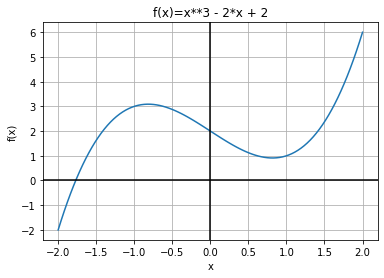

In [78]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x,1))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x**3 - 2*x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


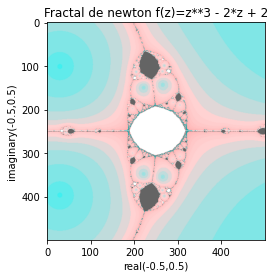

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


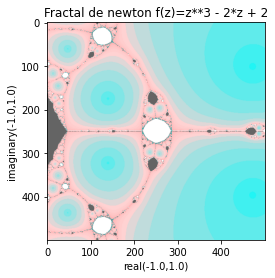

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


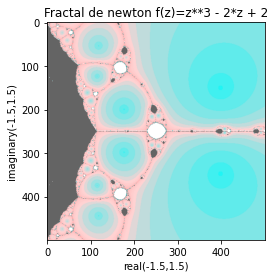

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


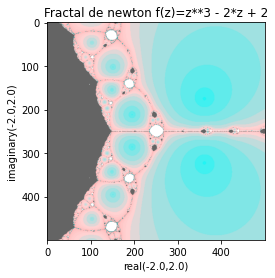

Z region from ( -10.0 , -10.0 ) to ( 10.0 , 10.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


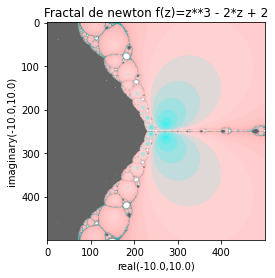

In [81]:
print("zoom out")
display1(zoom=1, n=1)
display1(zoom=2, n=1)
display1(zoom=3, n=1)
display1(zoom=4, n=1)
display1(zoom=20, n=1)

Fractal de Newton f(x)= sen(x)

Text(0, 0.5, 'f(x)')

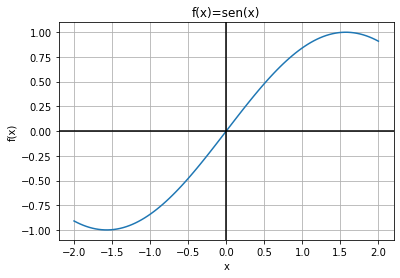

In [84]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x,2))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=sen(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


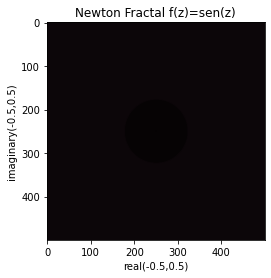

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


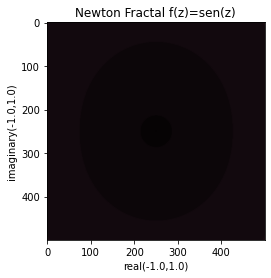

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


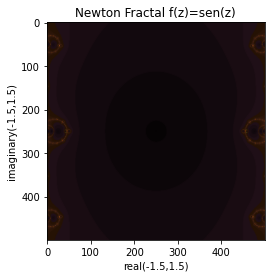

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


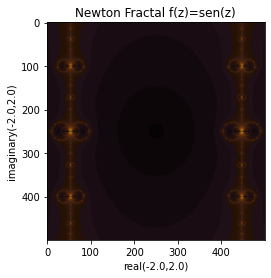

Z region from ( -10.0 , -10.0 ) to ( 10.0 , 10.0 )


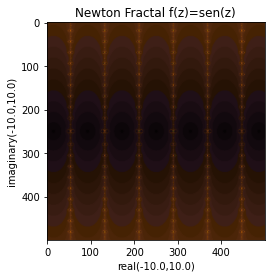

In [85]:
print("zoom out")
display1(zoom=1, n=2)
display1(zoom=2, n=2)
display1(zoom=3, n=2)
display1(zoom=4, n=2)
display1(zoom=20, n=2)

Fractal de Newton f(x)= x**3 - 1

Text(0, 0.5, 'f(x)')

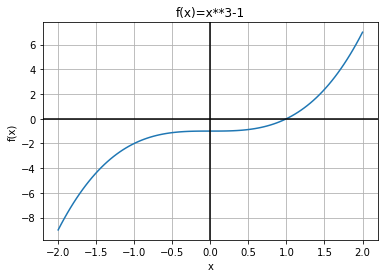

In [86]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x,3))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x**3-1')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


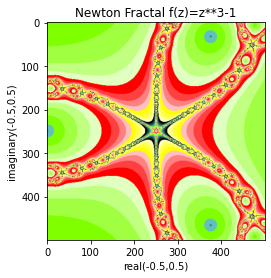

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


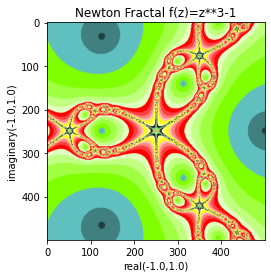

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


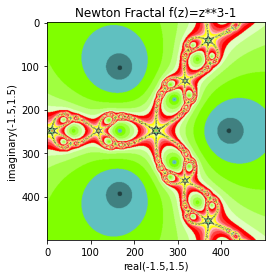

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


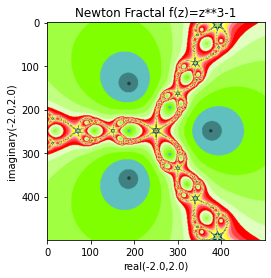

Z region from ( -10.0 , -10.0 ) to ( 10.0 , 10.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


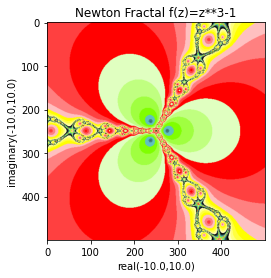

In [87]:
print("zoom out")
display1(zoom=1, n=3)
display1(zoom=2, n=3)
display1(zoom=3, n=3)
display1(zoom=4, n=3)
display1(zoom=20, n=3)